## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata.head())
# print(study_results.head())
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(merged_df['Mouse ID'].unique())

mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merged_df.loc[merged_df.duplicated(subset=["Timepoint","Mouse ID"], keep=False)==True]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_df=merged_df.set_index('Mouse ID')
cleaned =index_df.drop(['g989'])
cleaned_df=cleaned.reset_index()


In [7]:
# Checking the number of mice in the clean DataFrame.
# clean_mice_count = len(cleaned_df['Mouse ID'].unique())
# clean_mice_count
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor=cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor=cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
std_tumor =cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
var_tumor=cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sem_tumor=cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df= pd.DataFrame({
        "Mean":mean_tumor,
        "Median":median_tumor,
        "Variance":var_tumor,
         "STD": std_tumor,
         "SEM":sem_tumor})
# summary_df
# Using the aggregation method, produce the same summary statistics in a single line
agg_data=cleaned_df.groupby('Drug Regimen')
agg_df=agg_data.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested on Each Drug')

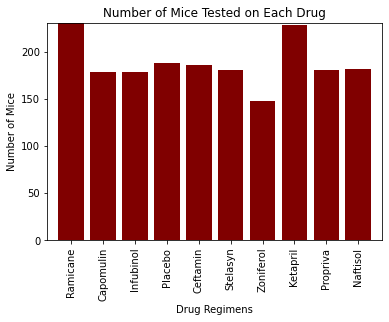

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Pulling x and y data
total_ID=cleaned_df.groupby(['Drug Regimen']).count()["Mouse ID"]
x_axis=np.arange(len(total_ID))

#plotting bar chart
bar_chart1=plt.bar(x_axis,total_ID,color='maroon',align='center')

#store and convert variables to list for tick
drug_list=list(cleaned_df['Drug Regimen'].unique())

#tick labels and location
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation="vertical")

#x and y limiters
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_ID)+0.4)

#labels
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested on Each Drug")

Text(0.5, 1.0, 'Number of Mice Tested on Each Drug')

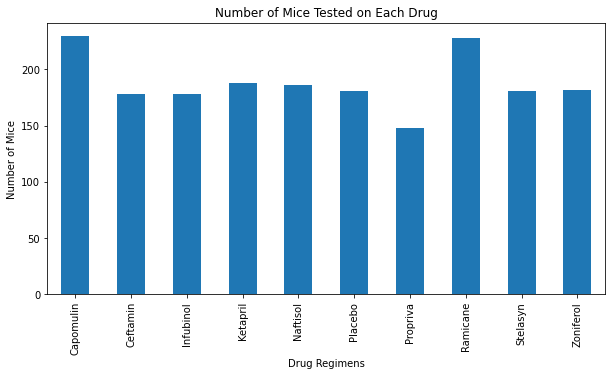

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_ID.plot(kind='bar', figsize=(10,5))
#labels
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested on Each Drug")

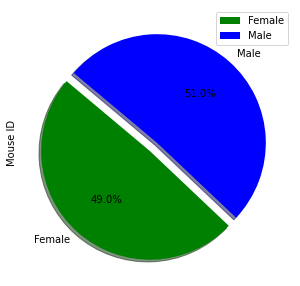

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist=cleaned_df.groupby(['Sex']).count()["Mouse ID"]
gender_dist
colors=['green','blue']
explode=(0.1,0)
gender_dist.plot(kind='pie',y='Count per Gender',explode=explode,
                 startangle=140,colors=colors,shadow=True,figsize=(5,5),autopct="%1.1f%%")
plt.legend(loc='best')

(-1.187075692956477,
 1.109124456344466,
 -1.1892878343980988,
 1.1116395376706474)

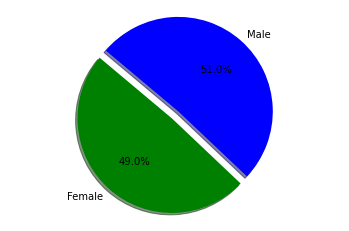

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]

#create pie plot using py
plt.pie(gender_dist,labels=labels,explode=explode,startangle=140,
        colors=colors,shadow=True,autopct="%1.1f%%")

#set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
